In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\zomato\zomato.csv")

In [3]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#list_comprehension
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [8]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100),4))

rate has 15.0 % missing values
phone has 2.0 % missing values
location has 0.0 % missing values
rest_type has 0.0 % missing values
dish_liked has 54.0 % missing values
cuisines has 0.0 % missing values
approx_cost(for two people) has 1.0 % missing values


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [13]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [14]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
###lambdA
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(str).apply(lambda x:x.replace(',',''))

In [16]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [17]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [18]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [19]:
df['rate'].dtype

dtype('O')

In [20]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df['rate'].isnull().sum()

7775

In [22]:
def split(x):
    return x.split('/')[0]

In [23]:
df['rate']=df['rate'].astype(str).apply(split)

In [24]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [26]:
df['rate']=df['rate'].astype(float)

In [27]:
df['rate'].dtype

dtype('float64')

<AxesSubplot:>

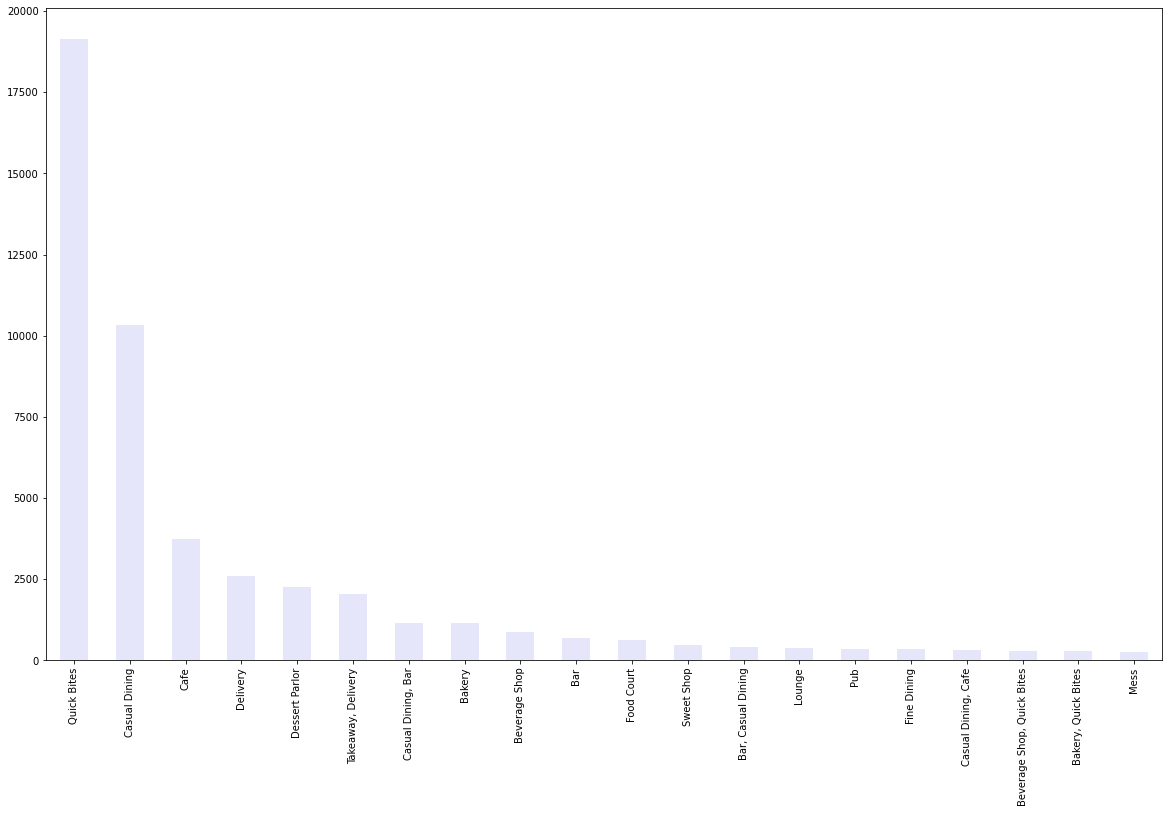

In [28]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='lavender')

In [29]:
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return 'Quick Bites+Casual Dining'
    else:
        return 'others'

In [30]:
df['Top_types']=df['rest_type'].apply(mark)

In [31]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                  Top_types  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [32]:
!pip install plotly

In [33]:
import plotly.express as px

In [34]:
values=df['Top_types'].value_counts().values
values

array([29462, 22255], dtype=int64)

In [35]:
labels=df['Top_types'].value_counts().index
labels

Index(['Quick Bites+Casual Dining', 'others'], dtype='object')

In [36]:
fig=px.pie(df, names=labels, values=values)
fig.show()

In [37]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [38]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [39]:
rest=df.groupby("name").agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()

In [40]:
rest.columns=['name','total_votes','total_utilities','avg_approx_cost','mean_rating']

In [41]:
rest.head()

name  total_votes  total_utilities  avg_approx_cost  \
0            #FeelTheROLL           14                2            200.0   
1              #L-81 Cafe          432                9            400.0   
2           #Vibes Restro            0                3            700.0   
3                 #refuel          111                3            400.0   
4  'Brahmins' Thatte Idli            0                1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [42]:
rest['votes_per_unity']=rest['total_votes']/rest['total_utilities']

In [43]:
rest.head()

name  total_votes  total_utilities  avg_approx_cost  \
0            #FeelTheROLL           14                2            200.0   
1              #L-81 Cafe          432                9            400.0   
2           #Vibes Restro            0                3            700.0   
3                 #refuel          111                3            400.0   
4  'Brahmins' Thatte Idli            0                1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [44]:
popular=rest.sort_values( by='total_utilities',ascending=False)

In [45]:
popular

name  total_votes  total_utilities  \
1320                   Cafe Coffee Day         3089               96   
5549                            Onesta       347520               85   
3788                         Just Bake         2898               73   
2446                 Empire Restaurant       229808               71   
2577                 Five Star Chicken         3134               70   
...                                ...          ...              ...   
1900                        Cool Break           11                1   
8076       The Shake Factory Originals            8                1   
5216        Nethravathi Military Hotel            0                1   
7426  Swadisht North Indian Restaurant           23                1   
5375                Night Punjabi Folk            0                1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [46]:
popular.shape

(8792, 6)

In [47]:
popular['name'].nunique()

8792

In [48]:
### avg votes recieved by restaurant
###top 5 most rated restaurant
###top 5 less voted restaurant

Text(0.5, 1.0, '5 least voted restaurants')

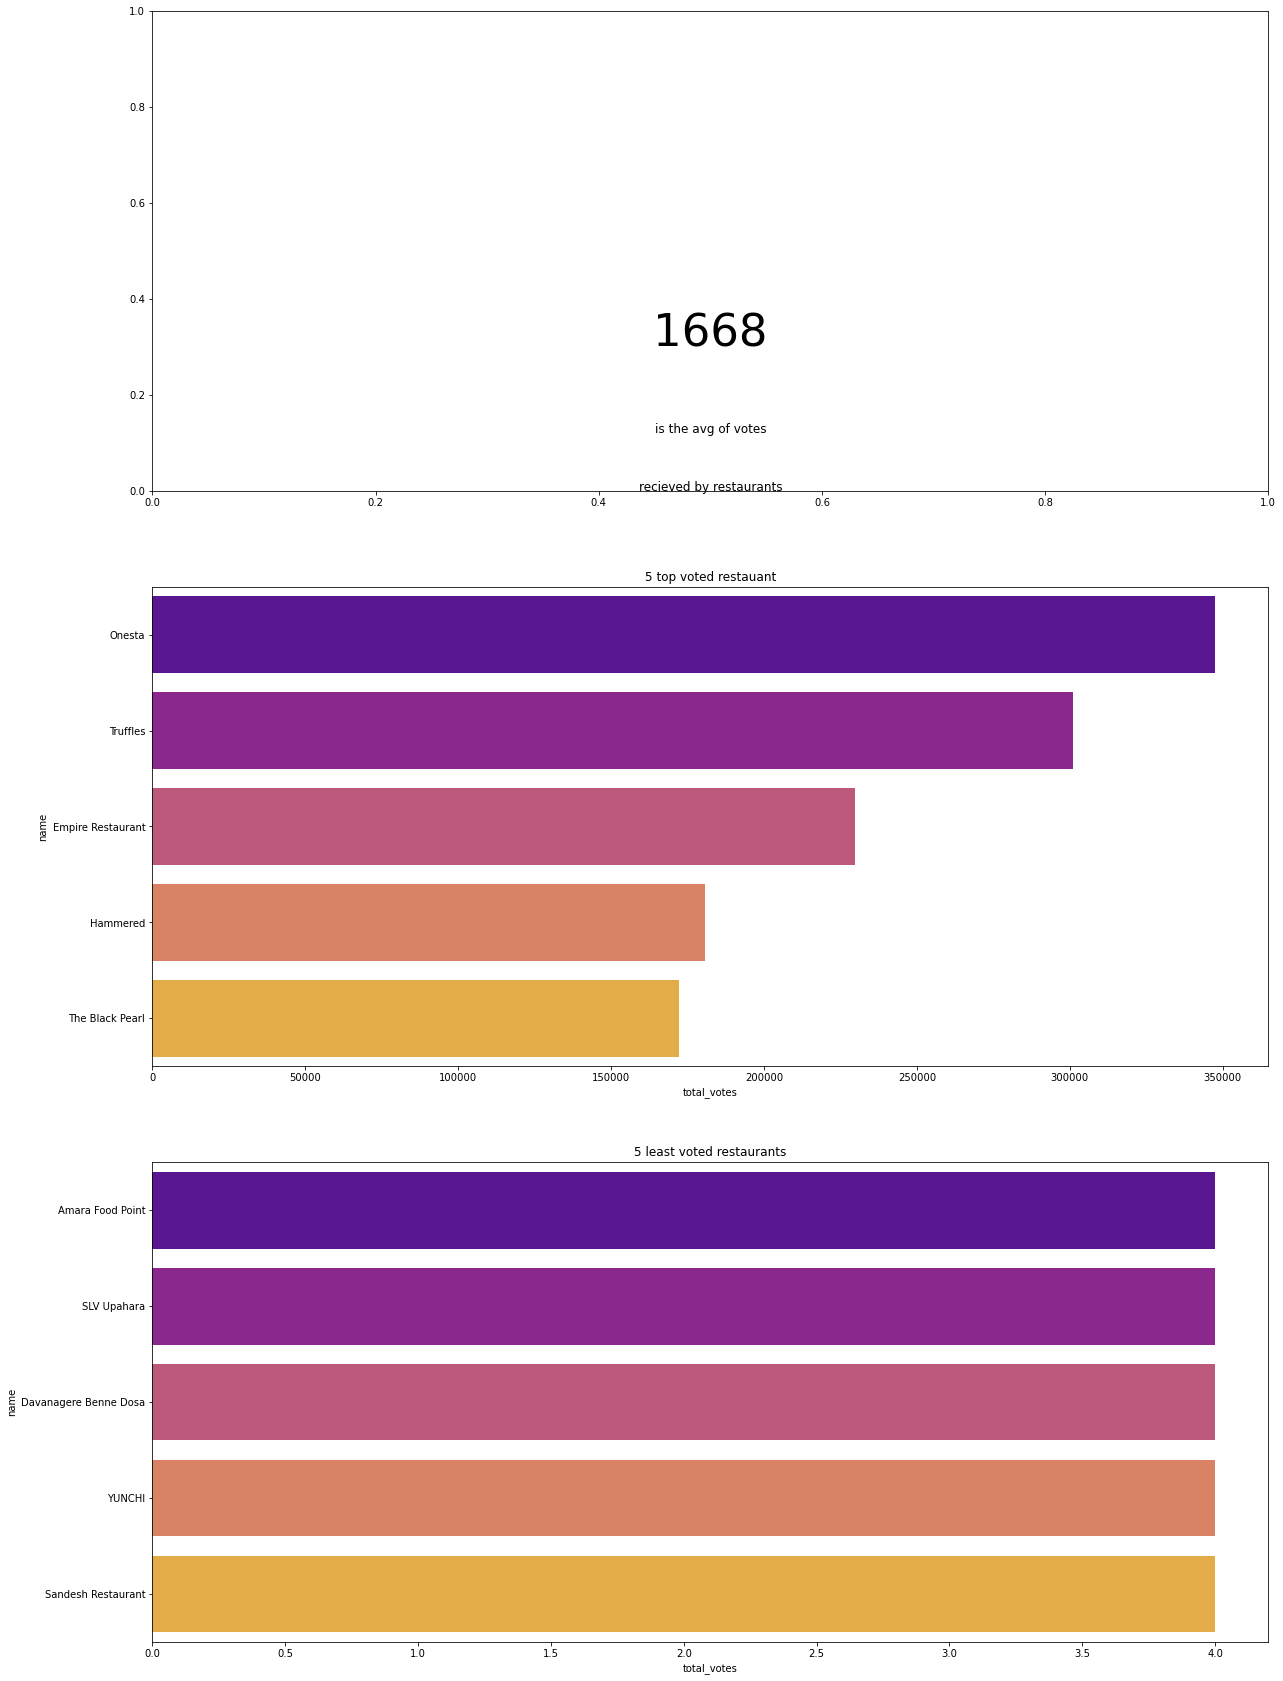

In [49]:
import seaborn as sns
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50,0.30,int(popular['total_votes'].mean()),fontsize=45, ha="center")
ax1.text(0.50, 0.12, 'is the avg of votes', fontsize=12, ha='center')
ax1.text(0.50,0.00,'recieved by restaurants',fontsize=12, ha='center')
sns.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending=False).query('total_votes>0').head(5),ax=ax2,palette='plasma').set_title('5 top voted restauant')
sns.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending=True).query('total_votes>0').head(5),ax=ax3,palette='plasma').set_title('5 least voted restaurants')


Text(0.5, 1.0, '5 cheapest restaurants')

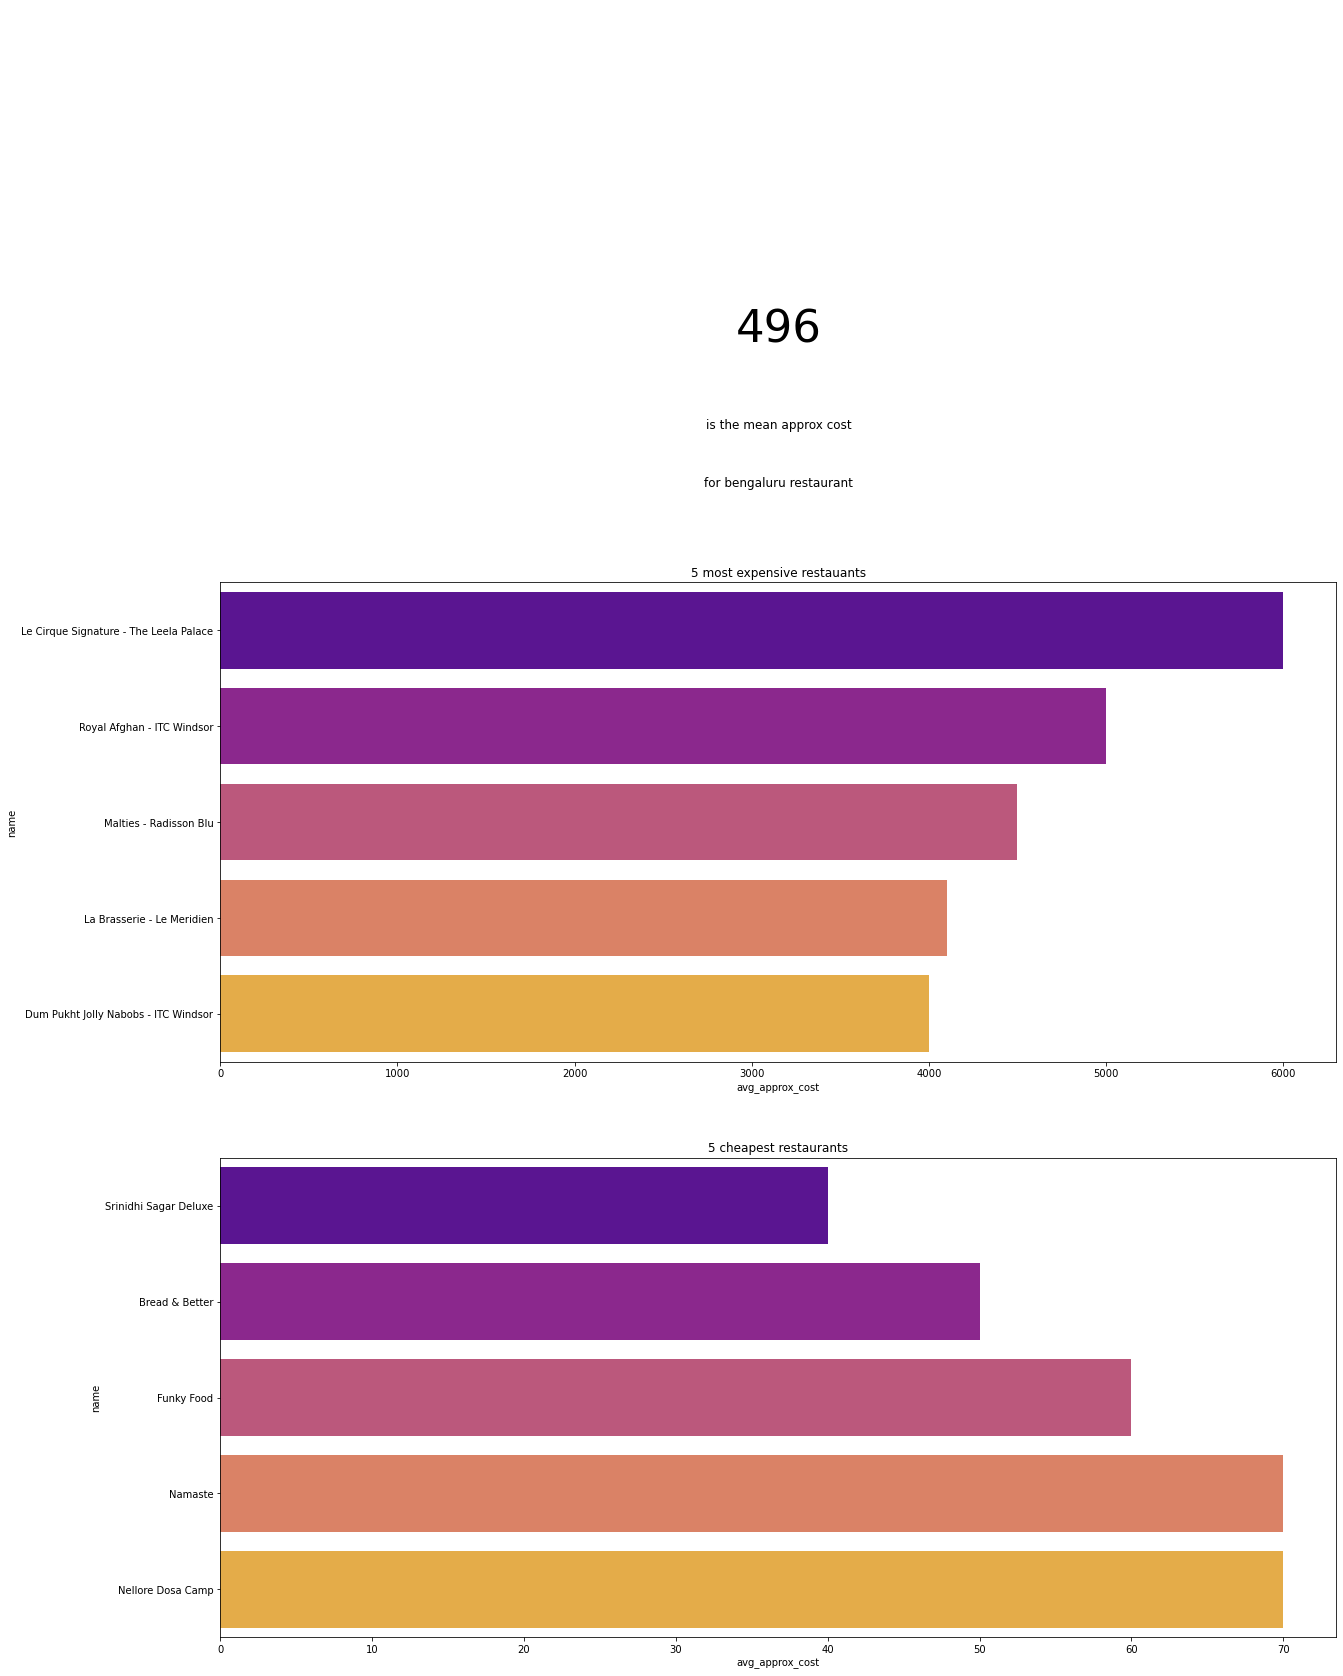

In [50]:
import seaborn as sns
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50,0.30,int(popular['avg_approx_cost'].mean()),fontsize=45, ha="center")
ax1.text(0.50, 0.12, 'is the mean approx cost', fontsize=12, ha='center')
ax1.text(0.50,0.00,'for bengaluru restaurant',fontsize=12, ha='center')
ax1.axis('off')
sns.barplot(x='avg_approx_cost',y='name',data=popular.sort_values(by='avg_approx_cost',ascending=False).query('avg_approx_cost>0').head(5),ax=ax2,palette='plasma').set_title('5 most expensive restauants')
sns.barplot(x='avg_approx_cost',y='name',data=popular.sort_values(by='avg_approx_cost',ascending=True).query('avg_approx_cost>0').head(5),ax=ax3,palette='plasma').set_title('5 cheapest restaurants')


In [51]:
x=df['book_table'].value_counts()
labels=['Not booking','booking']
import plotly.graph_objs as go
from plotly.offline import iplot


In [52]:
trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent')

In [53]:
iplot([trace])

In [54]:
y=df['online_order'].value_counts().values
labels=['accepted','not accepted']


In [55]:
fig=px.pie(df,values=y,names=labels,title='online bookings')

In [56]:
fig

In [57]:
##ANALYZING BUDGET RESTAURANTS
filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget=df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                  Top_types  
928  Bannerghatta Road  Quick Bites+Casual Dining  
934  Bannerghatta Road  Quick Bites+Casual Dining  
940  Bannerghatta Road  Quick Bites+Casual Dining  
942  Bannerghatta Road  Quick Bites+Casual Dining  
954  Bannerghatta Road  Quick Bites+Casual Dining

In [58]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [59]:
def return_budget(location, restaurant_type):
    filter=(df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget=df[filter]
    return (budget['name'].unique())

In [60]:
return_budget('BTM','Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [61]:
##finding lattitude and longitude
##performing geographical analysis

In [62]:
!pip install geopy

In [63]:
from geopy.geocoders import Nominatim

In [64]:
geolocater=Nominatim(user_agent='app')

In [65]:
data=df['name'][0]
data=geolocater.geocode(data)
data

Location(Jalsa, 25, Outer Ring Road, Doddanekundi, Dodda Nekkundi, Mahadevapura Zone, Bengaluru, Bangalore East, Bangalore Urban, Karnataka, 560037, India, (12.9775851, 77.6954241, 0.0))

In [66]:
data.longitude

77.6954241

In [67]:
data.latitude

12.9775851

In [68]:
df.shape

(51717, 18)

In [69]:
df['location'].nunique()

93

In [70]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [71]:
lat=[]
lon=[]
for location in locations['Name']:
    location=geolocater.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [72]:
locations['latitude']=lat
locations['longitude']=lon

In [73]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [74]:
rest_locations=df['location'].value_counts().reset_index()

In [75]:
rest_locations.columns=['Name','count']

In [76]:
rest_locations

Name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88              Yelahanka      6
89         West Bangalore      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [77]:
restaurant_locations=rest_locations.merge(locations,on='Name').dropna()

In [78]:
restaurant_locations.head()

Name  count   latitude   longitude
0                    BTM   5124  45.954851 -112.496595
1                    HSR   2523  18.147500   41.538889
2  Koramangala 5th Block   2504  12.934377   77.628415
3               JP Nagar   2235  12.265594   76.646540
4             Whitefield   2144  44.373058  -71.611858

In [79]:
import folium
from folium.plugins import HeatMap

In [80]:
basemap=folium.Map(location=[12.97,77.59])
basemap

In [81]:
HeatMap(data=restaurant_locations[['latitude','longitude','count']]).add_to(basemap)

In [82]:
basemap

In [83]:
##wordcloud -- to analyze customer reviews

In [84]:
!pip install wordcloud

In [85]:
from wordcloud import WordCloud, STOPWORDS

In [86]:
data=df[df['rest_type']=='Quick Bites']
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                  Top_types  
3     Banashankari  Quick Bites+Casual Dining  
31    Banashankari  Quick Bites+Casual Dining  
34    Banashankari  Quick Bites+Casual Dining  
36    Banashankari  Quick Bites+Casual Dining  
39    Banashankari  Quick Bites+Casual Dining

In [87]:
dishes=' '
for word in data['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes=dishes+' '.join(words)+' '  

In [88]:
dishes

' masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, v

In [89]:
stopwords=set(STOPWORDS)

In [90]:
wordcloud=WordCloud(stopwords=stopwords,width=3000,height=3000).generate(dishes)

(-0.5, 2999.5, 2999.5, -0.5)

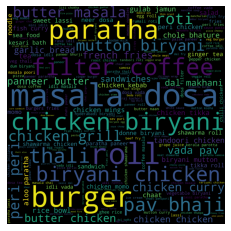

In [91]:
plt.imshow(wordcloud)
plt.axis('off')

In [92]:
data=df['reviews_list'][1]
data

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [93]:
data=data.lower()

In [94]:
import re

In [95]:
data2=re.sub('[^a-zA-Z]',' ',data)
data2

'   rated        rated n  had been here for dinner with family  turned out to be a good choose suitable for all ages of people  can try this place  we liked the most was their starters  service is good  prices are affordable  will recommend this restaurant for early dinner  the place is little noisy       rated        rated n  the ambience is really nice  staff is courteous  the price is pretty high for the quantity  but overall the experience was fine  the quality of food is nice but nothing extraordinary  they also have buffet only veg       rated        rated n  i felt good is little expensive for the quantity they serve and in terms of taste is decent  there is nothing much to talk about the ambience  regular casual dining restaurant where you can take your family for dinner or lunch  if they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might manage to get more repeat customers       rated        rated n  i was looking 

In [96]:
data3=re.sub('rated',' ',data2)
data3

'              n  had been here for dinner with family  turned out to be a good choose suitable for all ages of people  can try this place  we liked the most was their starters  service is good  prices are affordable  will recommend this restaurant for early dinner  the place is little noisy                  n  the ambience is really nice  staff is courteous  the price is pretty high for the quantity  but overall the experience was fine  the quality of food is nice but nothing extraordinary  they also have buffet only veg                  n  i felt good is little expensive for the quantity they serve and in terms of taste is decent  there is nothing much to talk about the ambience  regular casual dining restaurant where you can take your family for dinner or lunch  if they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might manage to get more repeat customers                  n  i was looking for a quite place to spend some 

In [97]:
data4=re.sub('x',' ',data3)
data4

'              n  had been here for dinner with family  turned out to be a good choose suitable for all ages of people  can try this place  we liked the most was their starters  service is good  prices are affordable  will recommend this restaurant for early dinner  the place is little noisy                  n  the ambience is really nice  staff is courteous  the price is pretty high for the quantity  but overall the e perience was fine  the quality of food is nice but nothing e traordinary  they also have buffet only veg                  n  i felt good is little e pensive for the quantity they serve and in terms of taste is decent  there is nothing much to talk about the ambience  regular casual dining restaurant where you can take your family for dinner or lunch  if they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might manage to get more repeat customers                  n  i was looking for a quite place to spend some 

In [98]:
data5=re.sub(' +',' ',data4)
data5

' n had been here for dinner with family turned out to be a good choose suitable for all ages of people can try this place we liked the most was their starters service is good prices are affordable will recommend this restaurant for early dinner the place is little noisy n the ambience is really nice staff is courteous the price is pretty high for the quantity but overall the e perience was fine the quality of food is nice but nothing e traordinary they also have buffet only veg n i felt good is little e pensive for the quantity they serve and in terms of taste is decent there is nothing much to talk about the ambience regular casual dining restaurant where you can take your family for dinner or lunch if they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might manage to get more repeat customers n i was looking for a quite place to spend some time with family and as well wanted to try some new place since i was at banashanka

In [99]:
wordcloud=WordCloud(stopwords=stopwords,width=3000,height=3000).generate(data4)

(-0.5, 2999.5, 2999.5, -0.5)

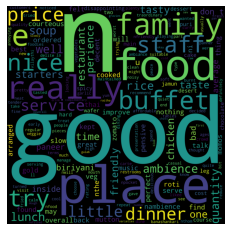

In [100]:
plt.imshow(wordcloud)
plt.axis('off')  

In [101]:
dataset=df[df['rest_type']=='Quick Bites']
dataset.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                  Top_types  
3     Banashankari  Quick Bites+Casual Dining  
31    Banashankari  Quick Bites+Casual Dining  
34    Banashankari  Quick Bites+Casual Dining  
36    Banashankari  Quick Bites+Casual Dining  
39    Banashankari  Quick Bites+Casual Dining

In [102]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review+str(review)

(-0.5, 2999.5, 2999.5, -0.5)

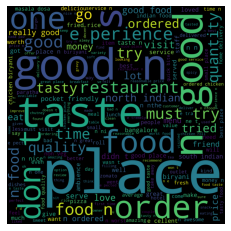

In [103]:
wordcloud2=WordCloud(stopwords=stopwords,width=3000,height=3000).generate(total_review)
plt.imshow(wordcloud2)
plt.axis('off')

In [104]:
##split df into two parts
##train data after removing new_resaurants that is restaurants with zero rating

In [105]:
def asign(x):
    if x>0:
        return 1
    else:
        return 0

In [106]:
df['rated']=df['rate'].apply(asign)

In [107]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [108]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [109]:
new_restaurants=df[df['rated']==0]

In [110]:
train_val_restaurants=df.query('rated==1')

In [111]:
train_val_restaurants

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

In [112]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [113]:
##creating target variable that will predict success
#domain expertise- how to cateorize into good and bad
#restaurant with rating<3.75 is bad while rating>3.75 is good

In [114]:
threshhold=3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshhold else 0)

In [115]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                  Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+Casual Dining      1       1  
2          Buffet    Banashankari                     others      1       1  
3          Buffet    Banashankari  Quick Bites+Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+Casual Dining      1       1

In [116]:
##checking imbalance
x=train_val_restaurants['target'].value_counts()

In [117]:
labels=x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x2a354dd4e80>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

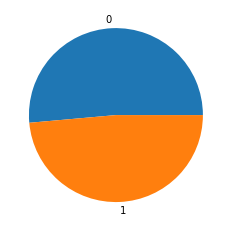

In [118]:
plt.pie(x,labels=labels)

In [119]:
#Feature importance

In [120]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [121]:
#reducing no. of columns
train_val_restaurants['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [122]:
def count(x):
    return len(x.split(','))

In [123]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

In [124]:
train_val_restaurants['multiple_type']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [125]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                  Top_types rated target  \
0          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   
1          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   
2          Buffet    Banashankari                     others     1      1   
3          Buffet    Banashankari  Quick Bites+Casual Dining     1      0   
4          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   

   total_cuisines  multiple_type  
0               3              1  
1               3              1  
2               3              2  
3               2              1  
4               2              1  

[5 rows x 22 columns]

In [126]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_type'],
      dtype='object')

In [127]:
imp_features=['online_order', 'book_table', 'location', 'rest_type', 
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)', 'target',
       'total_cuisines', 'multiple_type']

In [128]:
data=train_val_restaurants[imp_features]

In [129]:
data.shape

(41665, 10)

In [130]:
data.head()

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   
3           No         No  Banashankari          Quick Bites   
4           No         No  Basavanagudi        Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   
3                        300.0          Buffet    Banashankari       0   
4                        600.0          Buffet    Banashankari       1   

   total_cuisines  multiple_type  
0               3              1  
1               3              1  
2               3              2  
3               2              1  
4               2              1

In [131]:
##treating missing values
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_type                    0
dtype: int64

In [132]:
data.shape

(41665, 10)

In [133]:
data.dropna(how='any', inplace=True)

In [134]:
data.shape

(41271, 10)

In [135]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_type                    int64
dtype: object

In [136]:
cat_col=[column for column in data.columns if data[column].dtype=='O']

In [137]:
num_col=[column for column in data.columns if data[column].dtype!='O']

In [138]:
for feature in cat_col:
    print(feature, data[feature].nunique())

online_order 2
book_table 2
location 92
rest_type 87
listed_in(type) 7
listed_in(city) 30


In [139]:
data[cat_col].head()

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   
3           No         No  Banashankari          Quick Bites          Buffet   
4           No         No  Basavanagudi        Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

In [140]:
##feature encoding

In [141]:
##one-hot encoding(use for max 5 unique entries)
data['location'].nunique()

92

In [142]:
values=data['location'].value_counts()/len(data)*100
#if contribution<0.4 group in others

In [143]:
threshhold=0.4
values=values[values>threshhold]
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [144]:
data['location'].nunique()

92

In [145]:
values.nunique()

45

In [146]:
data['location']=np.where(data['location'].isin(values.index),data['location'],'other')

In [147]:
data['location'].nunique()

47

In [148]:
##data['location'].apply(lambda x:'other' if x not in values.index else x)

In [149]:
values2=(data['rest_type'].value_counts()/len(data))*100

In [150]:
threshhold=1.5
imp2=values2[values2>threshhold]

In [151]:
len(imp2)
##dimensionlaity reduced from 87 to 10

10

In [152]:
data['rest_type']=data['rest_type'].apply(lambda x:'other' if x not in imp2.index else x)

In [153]:
data['rest_type'].nunique()

11

In [154]:
for feature in cat_col:
    print('{} has total {} unique features'.format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [155]:
##one hot encoding

In [156]:
data_cat=data[cat_col]

In [157]:
for col in cat_col:
    col_encoded=pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)

In [158]:
data_cat.shape

(41271, 93)

In [159]:
##random forest-regression+classification model, ensemble learning approach,collection of multiple decision trees
##Decision tree: rule based tree- consider it like multiple ifs


In [160]:
data_cat.columns

Index(['online_order_Yes', 'book_table_Yes', 'location_Banashankari',
       'location_Banaswadi', 'location_Bannerghatta Road',
       'location_Basavanagudi', 'location_Bellandur', 'location_Brigade Road',
       'location_Brookefield', 'location_Church Street',
       'location_Commercial Street', 'location_Cunningham Road',
       'location_Domlur', 'location_Ejipura', 'location_Electronic City',
       'location_Frazer Town', 'location_HSR', 'location_Indiranagar',
       'location_JP Nagar', 'location_Jayanagar',
       'location_Jeevan Bhima Nagar', 'location_Kalyan Nagar',
       'location_Kammanahalli', 'location_Koramangala 1st Block',
       'location_Koramangala 3rd Block', 'location_Koramangala 4th Block',
       'location_Koramangala 5th Block', 'location_Koramangala 6th Block',
       'location_Koramangala 7th Block', 'location_Koramangala 8th Block',
       'location_Lavelle Road', 'location_MG Road', 'location_Malleshwaram',
       'location_Marathahalli', 'location_Ne

In [161]:
num_col

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_type']

In [162]:
data_final=pd.concat([data.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_type']],data_cat],axis=1)

In [163]:
data_final.shape

(41271, 97)

In [164]:
x=data_final.drop('target',axis=1)
y=data_final['target']

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [167]:
X_train.shape

(33016, 96)

In [168]:
X_test.shape

(8255, 96)

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
model=RandomForestClassifier()

In [171]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
prediction=model.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [174]:
confusion_matrix(prediction,y_test)

array([[3530,  939],
       [ 722, 3064]], dtype=int64)

In [175]:
accuracy_score(prediction,y_test)

0.7987886129618413

In [177]:
 ##LOGISTIC REGRESSION- sigmoid fn
##NAIVE BAYES: classification with Categorical data,classification with continuous data, nlp,works onb the basis of bayes theorem(probability)
##naive bayes can be used with text data: STOP WORDS, BOW TF-DDF :CONVERTING TEXT INTO NUMERIC DATA
##decision trees: 1. entropy/info gain 2. ginni index/impurity 3. pre prunning post prunning in case of over-fitting
##random forest reduces variance of decison trees
##entropy is measure of randomness, probabiliy of occurence of certain event in particular space
##entropy: -Pilog2(Pi)
##info gain- based on entropy which feature will get highest gain: helps to calculate parent node
##info gain = 1- ( ΣSn/S* Ei), S is total data pts, E is entropy where x=0, x=1
##highest entropy is selected as parent node
##gini impurity:(commonly used when continuous data set):1-[P(YES)^2+P(NO)^2]
##G(class): Σ (No. of instances/totalinstances*G)
##lower ginni impurity selected as root/parent node
##Past pruning/ bckward pruning: decision tree is generated, removes useless branches by expermenting using cross validation (grid search)
##pre-pruning/forward pruning: before building decision tree we control depth using crioss validation(randomize cv, grid search cv)


In [178]:
##diff algorithm for dt
##1. ID3: Classification
##2. C 4.5: Cont. and Dicrete data-num data-better than ID3-GINNI INDEX
##3. CART-Classification and Regression Trees  - Ginni Index
##4. C.50: Categorical target variable-entropy
##5. MARS- Multivariant regressive sptamp: series of pairwise linear model used to model irregularity among variables
##6. M5
##7. CIT, 8. CHAD


In [179]:
##ADV. 1. used in regression and classification both, easy to learn,3. Don't have to work on outliers, 
##4. No scaling and normalization required 
## DISADV: 1. If we make a small change in training data, it will cause unstability, it will shift a node. 
## 2. Problem of over fitting is high
## 3. Takes more time to train


In [180]:
##KNN: Classification and regression used cases
##limitation: cannot be used on huge data, takes lot of time, 
## K in no. of nearest neighbours that we have to calculate
##1. Cross validation- randomize search, grid search
##KNN PROS: Used in both classification & regression, easy maths behind
##KNN CONS: Time 

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [185]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))


In [189]:
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

Logistic Regression
0.7202907328891581
Naive bayes
0.6763173834039976
Random Forest
0.7923682616596003
Decision Tree Classifier
0.8291944276196245
KNN
0.8035130224106602
